<a href="https://colab.research.google.com/github/miladramzy/MCDM_DOE_UBC_ENGR_589/blob/main/Lab_3_Factorial_design_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENGR 489/589
### School of Engineering - Okanagan Campus
### By Milad Ramezankhani, Dr. Abbas Milani
#### milad.ramezankhani@ubc.ca | https://miladramzy.github.io/
## Lab 3 - Factorial Design

### Content:

* 2^3 Factorial - ANOVA
* Regression
* Residual Analysis
* 2^2 Factorial - ANOVA

### A) 2^3 Factorial - ANOVA

In [ ]:
## 2^3 Factorial design

# 1. Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import scipy.stats as stats
import pandas as pd

# 2. Load data 
### NOTE1: Follow the tempelate (Lab3_ENGR_489_589_Data.csv) for preparing your dataset.
data = pd.read_csv('Lab3_ENGR_489_589_Data.csv')
data.columns = ['A', 'B', 'D', 'Observation']

# 3. Perform ANOVA using Ordinary least squares (OLS) regression

result = ols('Observation ~ A + B + D + A:B + B:D + A:D + A:B:D', data = data).fit()
aov_table = sm.stats.anova_lm(result, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,0.666667,0.666667,0.022099,0.883680
B,1.0,770.666667,770.666667,25.546961,0.000117
D,1.0,280.166667,280.166667,9.287293,0.007679
A:B,1.0,16.666667,16.666667,0.552486,0.468078
B:D,1.0,48.166667,48.166667,1.596685,0.224475
A:D,1.0,468.166667,468.166667,15.519337,0.001172
A:B:D,1.0,28.166667,28.166667,0.933702,0.348282
Residual,16.0,482.666667,30.166667,NaN,NaN


### B) Regression

In [ ]:
## Regression
result = ols('Observation ~ A + B + D + A:B + B:D + A:D + A:B:D', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Observation   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     7.637
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000398
Time:                        18:17:35   Log-Likelihood:                -70.070
No. Observations:                  24   AIC:                             156.1
Df Residuals:                      16   BIC:                             165.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8333      1.121     36.421      0.000      38.457      43.210
A              0.1667      1.121      0.149      0.884      -2.210       2.543
B              5.6667      1.121      5.054      0.000       3.290       8.043
D              3.4167      1.121      3.048      0.008       1.040       5.793
A:B           -0.8333      1.121     -0.743      0.468      -3.210       1.543
B:D           -1.4167      1.121     -1.264      0.224      -3.793       0.960
A:D           -4.4167      1.121     -3.939      0.001      -6.793      -2.040
A:B:D         -1.0833      1.121     -0.966      0.348      -3.460       1.293
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.170
Skew:                           0.671   Prob(JB):                        0.338
Kurtosis:                       2.391   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### C) Residual Analysis

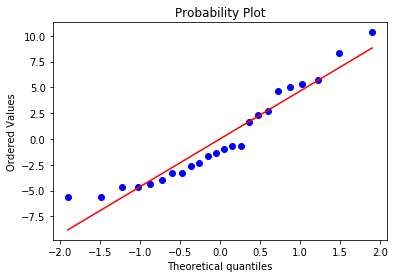

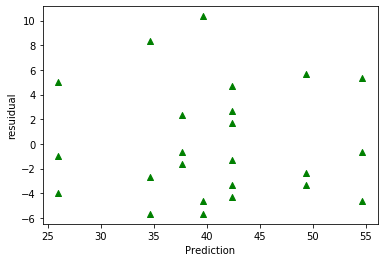

In [ ]:
#Residual Analysis

# 1. import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# 2. Normal probability assumption
residual = result.resid # gives residuals for regression
stats.probplot(residual, fit=True, plot=plt)
plt.show()

# 3. Constant variance assumption
predicted = result.fittedvalues # generates predicted values
plt.scatter(predicted, residual, marker='^', c='green')
plt.xlabel('Prediction')
plt.ylabel('resuidual')
plt.show()

### D) 2^2 Factorial - ANOVA

In [ ]:
## 2^2 Factorial design

# 1. Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import scipy.stats as stats
import pandas as pd

# 2. Load data 
### NOTE1: Follow the tempelate (Lab3_ENGR_489_589_Data.csv) for preparing your dataset.
data_raw = pd.read_csv('Lab3_ENGR_489_589_Data.csv')
data = data_raw[['A', 'B', 'Observation']]

# 3. Perform ANOVA using Ordinary least squares (OLS) regression
result = ols('Observation ~ A + B + A:B', data = data).fit()
aov_table = sm.stats.anova_lm(result, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(A),1.0,0.666667,0.666667,0.010199,0.920564
C(B),1.0,770.666667,770.666667,11.789903,0.002629
C(A):C(B),1.0,16.666667,16.666667,0.254972,0.619114
Residual,20.0,1307.333333,65.366667,NaN,NaN


In [ ]:
|